In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import the required libraries for the dataset

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


We have read the csv file by using the pd. read to get the dataset for the prediction

In [3]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Check the null values present in the dataset and then remove the null values

In [4]:
df.shape

(1000, 40)

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical Columns:  ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', '_c39']


Check the categorical and numerical data from the dataset and then convert all the required categorical data into numerical data

In [7]:
df['fraud_reported'].replace('N',0,inplace=True)
df['fraud_reported'].replace('Y',1,inplace=True)

In [8]:
df['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

Converted the target varibale Fraud_report into numerical data by using replace

In [9]:
df.drop(['_c39'], axis=1, inplace=True)

In [10]:
df.drop(['months_as_customer'], axis=1, inplace=True)

In [11]:
df.drop(['age'], axis=1, inplace=True)

In [12]:
df.drop(['policy_number'], axis=1, inplace=True)

In [13]:
df.drop(['policy_bind_date'], axis=1, inplace=True)

In [14]:
df.drop(['policy_state'], axis=1, inplace=True)

In [15]:
df.drop(['policy_csl'], axis=1, inplace=True)

In [16]:
df.drop(['policy_deductable'], axis=1, inplace=True)

In [17]:
df.drop(['police_report_available'], axis=1, inplace=True)

In [18]:
df.drop(['auto_make'], axis=1, inplace=True)

In [19]:
df.drop(['auto_model'], axis=1, inplace=True)

In [20]:
df.drop(['auto_year'], axis=1, inplace=True)

In [21]:
df.drop(['insured_zip'], axis=1, inplace=True)

In [22]:
df.drop(['umbrella_limit'], axis=1, inplace=True)

In [23]:
df.drop(['bodily_injuries'], axis=1, inplace=True)

In [24]:
df.drop(['witnesses'], axis=1, inplace=True)

Drop the unnecessary data from the dataset to get the proper prediction for the target variable

In [25]:
df=pd.get_dummies(df).astype(int)
df.head()

,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,...,incident_location_9911 Britain Lane,incident_location_9918 Andromedia Drive,incident_location_9929 Rock Drive,incident_location_9935 4th Drive,incident_location_9942 Tree Ave,incident_location_9980 Lincoln Ave,incident_location_9988 Rock Ridge,property_damage_?,property_damage_NO,property_damage_YES
0,1406,53300,0,5,1,71610,6510,13020,52080,1,...,0,0,0,1,0,0,0,0,0,1
1,1197,0,0,8,1,5070,780,780,3510,1,...,0,0,0,0,0,0,0,1,0,0
2,1413,35100,0,7,3,34650,7700,3850,23100,0,...,0,0,0,0,0,0,0,0,1,0
3,1415,48900,-62400,5,1,63400,6340,6340,50720,1,...,0,0,0,0,0,0,0,1,0,0
4,1583,66000,-46000,20,1,6500,1300,650,4550,0,...,0,0,0,0,0,0,0,0,1,0


Create the dummy dataset which will help in converting the categodical data into numerical data

In [26]:
df.skew()

policy_annual_premium                  0.004471
capital-gains                          0.478850
capital-loss                          -0.391472
incident_hour_of_the_day              -0.035584
number_of_vehicles_involved            0.502664
                                        ...    
incident_location_9980 Lincoln Ave    31.622777
incident_location_9988 Rock Ridge     31.622777
property_damage_?                      0.584210
property_damage_NO                     0.685977
property_damage_YES                    0.863806
Length: 1153, dtype: float64

<AxesSubplot:>

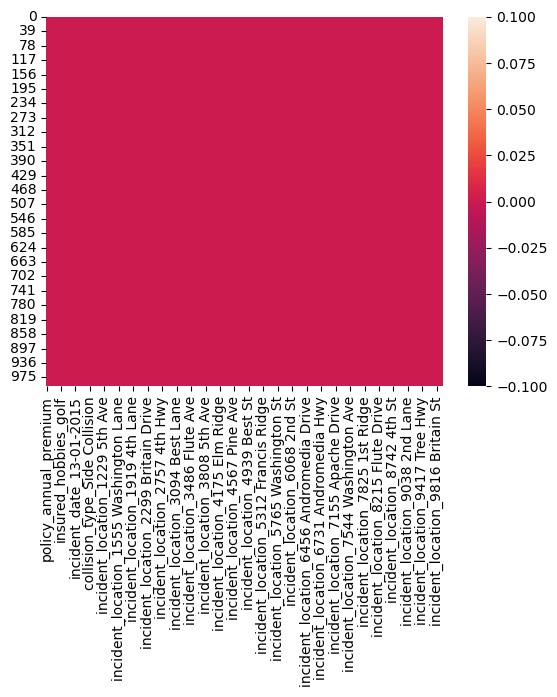

In [27]:
sns.heatmap(df.isnull())

Check the skewness of the dataset. Also created the heatmap for the data

1124    6
1281    6
1459    5
1362    5
1422    5
       ..
966     1
1030    1
904     1
1829    1
766     1
Name: policy_annual_premium, Length: 612, dtype: int64


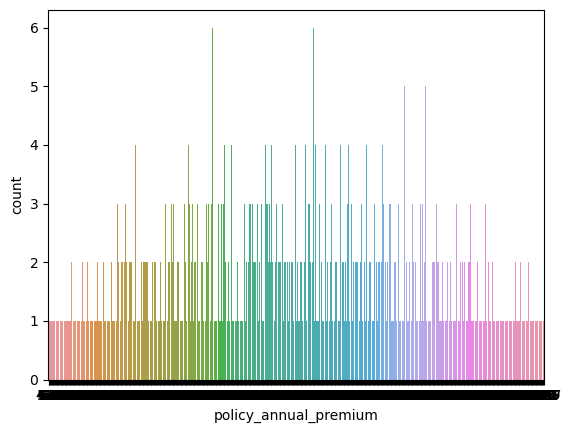

In [28]:
ax=sns.countplot(x='policy_annual_premium', data=df)
print(df['policy_annual_premium'].value_counts())

Created the countplot for policy annual premium

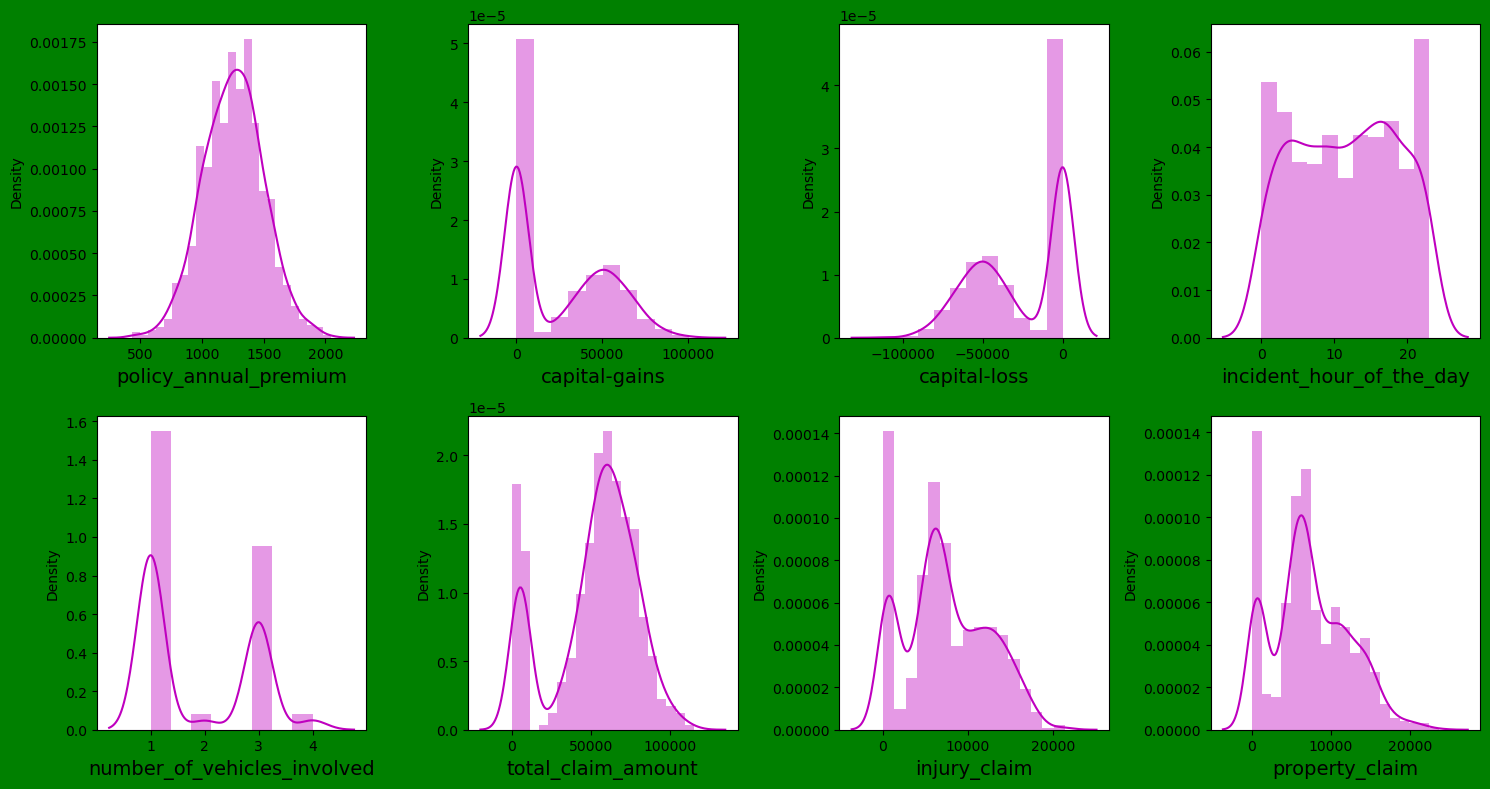

In [29]:
plt.figure(figsize=(15,8), facecolor= "green")
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Created the subplot for the dataset to verify the skewness in the data

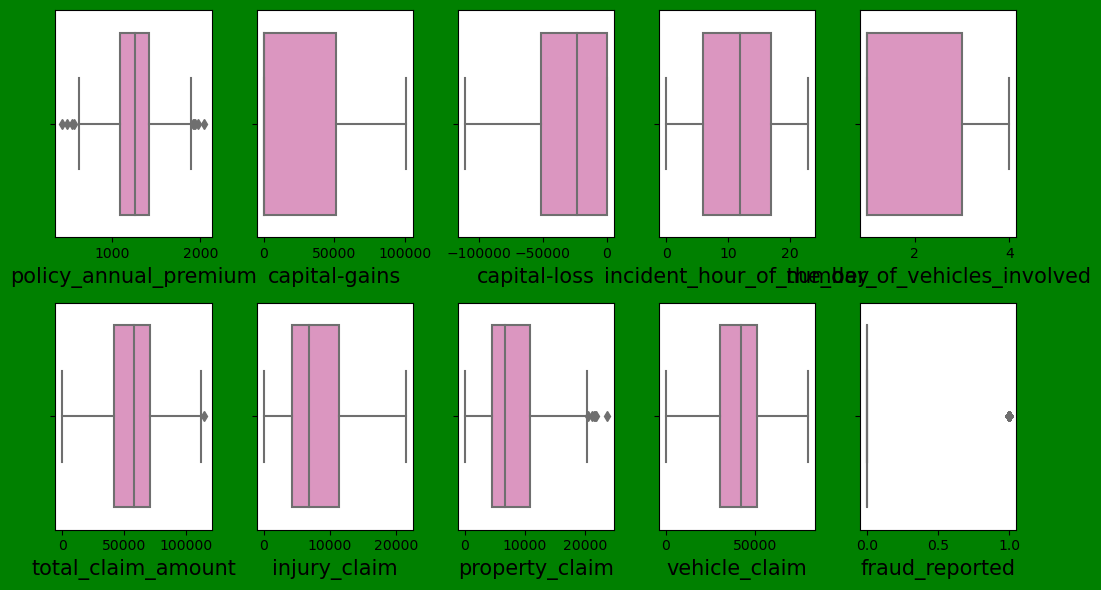

In [30]:
plt.figure(figsize=(10,6), facecolor= 'green')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Created the boxplot for the dataset which will show the outliers and skewness

In [31]:
cor= df.corr()
cor

,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,...,incident_location_9911 Britain Lane,incident_location_9918 Andromedia Drive,incident_location_9929 Rock Drive,incident_location_9935 4th Drive,incident_location_9942 Tree Ave,incident_location_9980 Lincoln Ave,incident_location_9988 Rock Ridge,property_damage_?,property_damage_NO,property_damage_YES
policy_annual_premium,1.000000,-0.013702,0.023528,-0.001586,-0.045957,0.009097,-0.017598,-0.011674,0.020247,-0.014500,...,-0.006990,-0.036681,-0.009194,0.019459,0.015440,0.024256,0.001826,-0.084097,0.006928,0.080783
capital-gains,-0.013702,1.000000,-0.046904,-0.016406,0.061643,0.015980,0.025934,-0.000779,0.015836,-0.019173,...,0.037221,0.028704,-0.028536,0.031997,-0.028536,-0.028536,-0.001279,-0.041033,0.042236,-0.000616
capital-loss,0.023528,-0.046904,1.000000,-0.025054,-0.014895,-0.036060,-0.046060,-0.022863,-0.032665,-0.014863,...,-0.071304,0.030178,-0.038190,0.030178,0.030178,0.030178,-0.026701,0.007367,-0.023957,0.016981
incident_hour_of_the_day,-0.001586,-0.016406,-0.025054,1.000000,0.120794,0.217702,0.165768,0.179536,0.215626,0.004316,...,0.051712,0.015282,-0.030255,-0.030255,-0.002933,0.033497,-0.034808,-0.057523,-0.004160,0.064425
number_of_vehicles_involved,-0.045957,0.061643,-0.014895,0.120794,1.000000,0.274278,0.224650,0.219084,0.269393,0.051839,...,0.036070,0.005002,-0.026066,-0.026066,0.036070,0.036070,-0.026066,-0.000082,0.013323,-0.013641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
incident_location_9980 Lincoln Ave,0.024256,-0.028536,0.030178,0.033497,0.036070,-0.005961,-0.013771,-0.013709,-0.001272,0.055242,...,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,1.000000,-0.001001,0.042185,-0.022607,-0.020811
incident_location_9988 Rock Ridge,0.001826,-0.001279,-0.026701,-0.034808,-0.026066,-0.055586,-0.044057,-0.044349,-0.054990,-0.018120,...,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,-0.001001,1.000000,-0.023729,0.044278,-0.020811
property_damage_?,-0.084097,-0.041033,0.007367,-0.057523,-0.000082,-0.018966,-0.028032,-0.015382,-0.015339,0.068017,...,-0.023729,-0.023729,0.042185,-0.023729,0.042185,0.042185,-0.023729,1.000000,-0.535908,-0.493329
property_damage_NO,0.006928,0.042236,-0.023957,-0.004160,0.013323,-0.039570,-0.019004,-0.028274,-0.043182,-0.085715,...,0.044278,-0.022607,-0.022607,-0.022607,-0.022607,-0.022607,0.044278,-0.535908,1.000000,-0.470008


Here we are checking the correlation between the dataset

In [32]:
x=df.drop("fraud_reported", axis=1)
y=df["fraud_reported"]

We will drop the target variable in the x axis

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim,vehicle_claim,insured_sex_FEMALE,...,incident_location_9911 Britain Lane,incident_location_9918 Andromedia Drive,incident_location_9929 Rock Drive,incident_location_9935 4th Drive,incident_location_9942 Tree Ave,incident_location_9980 Lincoln Ave,incident_location_9988 Rock Ridge,property_damage_?,property_damage_NO,property_damage_YES
0,0.615044,1.011331,0.953851,-0.956261,-0.823865,0.714257,-0.189283,1.165505,0.749653,-1.076953,...,-0.031639,-0.031639,-0.031639,31.606961,-0.031639,-0.031639,-0.031639,-0.750000,-0.714545,1.520282
1,-0.241432,-0.901927,0.953851,-0.524475,-0.823865,-1.807312,-1.363822,-1.372696,-1.823346,-1.076953,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,1.333333,-0.714545,-0.657773
2,0.643730,0.358023,0.953851,-0.668404,1.140056,-0.686362,0.054644,-0.736072,-0.785565,0.928546,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.750000,1.399493,-0.657773
3,0.651926,0.853388,-1.267577,-0.956261,-0.823865,0.403135,-0.224130,-0.219722,0.677607,0.928546,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,1.333333,-0.714545,-0.657773
4,1.340386,1.467210,-0.683741,1.202666,-0.823865,-1.753121,-1.257232,-1.399654,-1.768252,-1.076953,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.750000,1.399493,-0.657773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.221639,-0.901927,0.953851,1.202666,-0.823865,1.305049,2.051155,0.273817,1.224309,0.928546,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.750000,-0.714545,1.520282
996,0.737984,1.643100,0.953851,1.634452,-0.823865,2.111466,2.182342,2.214794,1.821868,0.928546,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.750000,-0.714545,1.520282
997,0.520791,0.358023,0.953851,-1.100189,1.140056,0.558507,0.013648,0.020826,0.771902,0.928546,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,1.333333,-0.714545,-0.657773
998,0.410146,-0.901927,0.953851,-1.388046,-0.823865,-0.219110,-0.453708,-0.451976,-0.073580,-1.076953,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,1.333333,-0.714545,-0.657773


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.14927327661695883
R-squared (R2) Score: 0.2512939103851596


Created the linesr regression model for the prediction

In [37]:
import joblib
joblib.dump(model,"fraud_reported.pkl")

['fraud_reported.pkl']

In [38]:
model = joblib.load("fraud_reported.pkl")
prediction = model.predict(X_test)
prediction

array([ 0.22489933,  0.18035282,  0.15157122,  0.28276472,  0.18566919,
        0.11040246,  0.37755483,  0.46609466,  0.19821486,  0.12745862,
       -0.08826853,  0.04497646,  0.14538141,  0.47670436,  0.29878386,
        0.00266163,  0.22086898,  0.42377312,  0.47551227,  0.41285998,
        0.14803278,  0.00158758,  0.13087277,  0.02774053,  0.01690474,
        0.1271673 ,  0.41195373,  0.20861263,  0.19059887,  0.15240681,
        0.10782723,  0.14963498,  0.18986992,  0.16911434,  0.41260552,
        0.38712929,  0.22626615,  0.09212558,  0.10321678, -0.02968945,
        0.46013805,  0.37287286,  0.13283855,  0.50332311,  0.48555283,
        0.48102467,  0.18351464,  0.26989326,  0.1849789 ,  0.04482005,
        0.15785601,  0.2146895 ,  0.48832856,  0.24969293,  0.44954095,
        0.33703679,  0.15306893,  0.12633871,  0.08171593,  0.02738105,
        0.25018323,  0.10698474,  0.35615942,  0.10069888,  0.23217342,
        0.09884453,  0.13594159,  0.18842862,  0.32315542,  0.13

In [39]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,0.224899,0
1,0.180353,0
2,0.151571,0
3,0.282765,0
4,0.185669,0
...,...,...
195,0.202437,0
196,0.134440,0
197,0.193279,0
198,0.233773,0


Finally we have predicted the target variable which is fraud_reported for the insurance claim fraud detection